<a href="https://colab.research.google.com/github/albertos-2002/SF3/blob/main/elettronica/esperienza_3/Esperienza_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Librerie

In [ ]:
def retta_fit_xba(x, b,a):
  y = []
  for i in range(len(x)):
    dummy = 0
    dummy = (x[i]*b) + a
    y.append(dummy)
  return y

In [ ]:
def regrlin_pear_errpost_xys(input_x, input_y, input_sigma) :
  import math
  import sys
  #dati input
  x = list(input_x)
  y = list(input_y)
  sigma = list(input_sigma)
  dimensione = len(x)
  if len(x) != len(y):
    print("X E Y DIMENSIONE DIVERSA")
    sys.exit()
  if len(x) != len(sigma):
    print("X E SIGMA DIMENSIONE DIVERSA")
    sys.exit()
  #REGRESSIOBNE LINEARE
  #calcolo del delta
  parametro_1 = 0
  parametro_2 = 0
  parametro_3 = 0
  for i in range(dimensione): #primo termine del delta
    dummy_1 = 0
    dummy_1 = 1/ pow(sigma[i],2)
    parametro_1 = dummy_1 + parametro_1
  for i in range(dimensione): #secondo termine del delta
    dummy_2 = 0
    dummy_2 = pow(x[i],2) / pow(sigma[i],2)
    parametro_2 = dummy_2 + parametro_2
  dummy_3_1 = 0
  for i in range(dimensione): #terzo termine del delta
    dummy_3 = 0
    dummy_3 = x[i] / pow(sigma[i],2)
    dummy_3_1 = dummy_3 + dummy_3_1
  parametro_3 = pow(dummy_3_1,2)
  delta = (parametro_1*parametro_2) - parametro_3
  delta_1 = 1/delta
  #calcolo di b
  parametro_4 = 0
  parametro_5 = 0
  parametro_6 = 0
  parametro_7 = 0
  for i in range(dimensione): #calcolo del primo termine di a
    dummy_4 = 0
    dummy_4 = 1/pow(sigma[i],2)
    parametro_4 = dummy_4 + parametro_4
  for i in range(dimensione): #calcolo del secondo termine di a
    dummy_5 = 0
    dummy_5 = (x[i]*y[i]) / pow(sigma[i],2)
    parametro_5 = dummy_5 + parametro_5
  for i in range(dimensione): #calcolo del terzo termine di a
    dummy_6 = 0
    dummy_6 = x[i] / pow(sigma[i],2)
    parametro_6 = dummy_6 + parametro_6
  for i in range(dimensione): #calcolo del quarto termine di a
    dummy_7 = 0
    dummy_7 = y[i] / pow(sigma[i],2)
    parametro_7 = dummy_7 + parametro_7
  dummy_b1 = delta_1*parametro_4*parametro_5
  dummy_b2 = delta_1*parametro_6*parametro_7
  b = dummy_b1-dummy_b2
	#calcolo di a
  parametro_8 = parametro_2
  parametro_9 = parametro_7
  parametro_10 = parametro_6
  parametro_11 = parametro_5
  dummy_a1 = delta_1*parametro_8*parametro_9
  dummy_a2 = delta_1*parametro_10*parametro_11
  a = dummy_a1-dummy_a2
  #calcolo incertezza e covarianza
  #sigma b
  sigma_b = math.sqrt(delta_1*parametro_1)
  #sigma a
  sigma_a = math.sqrt(delta_1*parametro_8)
  #covrianza
  #al mmento non disponibile
  #COEFFICIENTE DI CORRELLAZIONE DI PEARSON
  media_x = sum(x) / dimensione
  media_y = sum(y) / dimensione
  numeratore = 0
  denominatore = 0
  dummy_denx = 0
  dummy_deny = 0
  for i in range(dimensione):
    dummy_x = x[i]-media_x
    dummy_y = y[i]-media_y
    dummy_numeratore = dummy_x*dummy_y
    numeratore = dummy_numeratore + numeratore
    dummy_x2 = pow(dummy_x,2)
    dummy_y2 = pow(dummy_y,2)
    dummy_denx = dummy_x2 + dummy_denx
    dummy_deny = dummy_y2 + dummy_deny
  dummy_denominatore = dummy_denx * dummy_deny
  denominatore = math.sqrt(dummy_denominatore)
  rxy = numeratore / denominatore
  numeratore_sigma = 1 - pow(rxy,2)
  denominatore_sigma = dimensione - 2
  sigma_rxy = math.sqrt(numeratore_sigma/denominatore_sigma)
  #ERRORE A POSTERIORI
  parametro_12 = 1 / (dimensione - 2)
  y_riferimento = []
  for i in range(dimensione):
    dummy_y = 0
    dummy_y = a + (b*x[i])
    y_riferimento.append(dummy_y)
  scarti_quadrati = 0
  for i in range(dimensione):
    dummy_sq = y[i] - y_riferimento[i]
    dummy_sq2 = pow(dummy_sq,2)
    scarti_quadrati = dummy_sq2 + scarti_quadrati
  errore_posteriori = math.sqrt(parametro_12*scarti_quadrati)
  #print dei risultati
  print("pendenza $b$\t", b)
  print("$\sigma_b$\t", sigma_b)
  print("intercetta $a$\t", a)
  print("$\sigma_a$\t", sigma_a)
  #print("covarianza", )
  print("Coefficiente di Pearson $\\rho_{xy}$\t",  rxy)
  print("$\sigma_{\\rho_{xy}}$\t", sigma_rxy)
  print("Errore a posteriori $\delta$\t",  errore_posteriori)

#Analisi

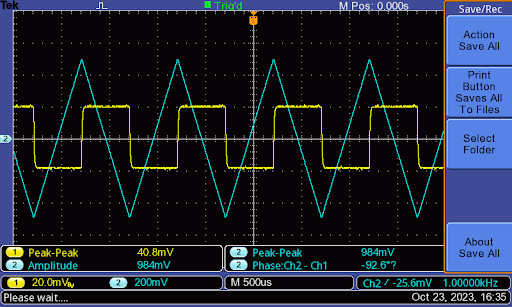

capacita metric 0.650 scala 1000pf 0.68pF
R1 8.1667 scala 10.000k
Rf 14.972 scala 100.00k

In [ ]:
#frequenza di taglio teorica
R1 = 8.1667 #kohm
c1 = 0.65 #nF
Rf = 14.972 #kohm

#frequenza di taglio teorica con la formula classica
f_t = 1/ (2*math.pi*R1*(10**3)*c1*(10**-9))
print("frequenza di taglio [Hz] \n", f_t)
print("\n", R1*(10**3)*c1*(10**-9))

frequenza di taglio [Hz] 
 29981.970514763107

 5.308355000000001e-06


In [ ]:
frequenza_khz = [0.1, 0.215, 0.464, 1, 2.15, 4.64, 10, 21.5, 46.4, 100, 215, 464, 1000, 18.5, 18.8, 19.1, 19.4, 18.2]
v_in = [1.03, 1.04, 1.01, 1.01, 1.01, 1.01, 0.992, 1, 1, 1.03, 1, 1.02, 1.02, 1, 1, 1, 1, 1]
v_out = [0.02, 0.02, 0.02, 0.061, 0.132, 0.276, 0.564, 1.06, 1.56, 1.8, 1.88, 1.88, 1.52, 0.944, 0.952, 0.96, 0.976, 0.928 ]
v_in_div = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
v_out_div = [0.2, 0.5, 0.5, 0.02, 0.02, 0.05, 0.1, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.2, 0.2, 0.2, 0.2, 0.2]

In [ ]:
A = []
log_A = []
err_A = []
err_log_A = []
frequenza_hz = []

for i in range(len(v_in)):
  dummy=0
  dummy = v_out[i]/v_in[i]
  A.append(dummy)

for i in A:
  dummy = 0
  dummy =  10*math.log10(i)
  log_A.append(dummy)

for i in frequenza_khz:
  dummy = 0
  dummy = i*1000
  frequenza_hz.append(dummy)

#calcolo degli errori
for i in range(len(v_in)):
  dummy_err_vout = math.sqrt( ((1/10)*v_out_div[i])**2 + ((3/100)*v_out[i])**2)
  #print(dummy_err_vout, "err_vout" ,"")
  dummy_err_vin = math.sqrt( ((1/10)*v_in_div[i])**2 + ((3/100)*v_in[i])**2 )
  #print(dummy_err_vin, "err_vin" ,"")
  dummy_g = v_out[i]/v_in[i]
  #print(dummy_g, "g" ,"")
  dummy_err_g = dummy_g * math.sqrt( (dummy_err_vout/v_out[i])**2 + (dummy_err_vin/v_in[i])**2 )
  #print(dummy_err_g, "err_g" ,"")
  dummy_err_A = 10*(dummy_err_g / (dummy_g*math.log(10)))
  err_log_A.append(dummy_err_A)
  #print(dummy_err_A)
  #print("-----------------------------")

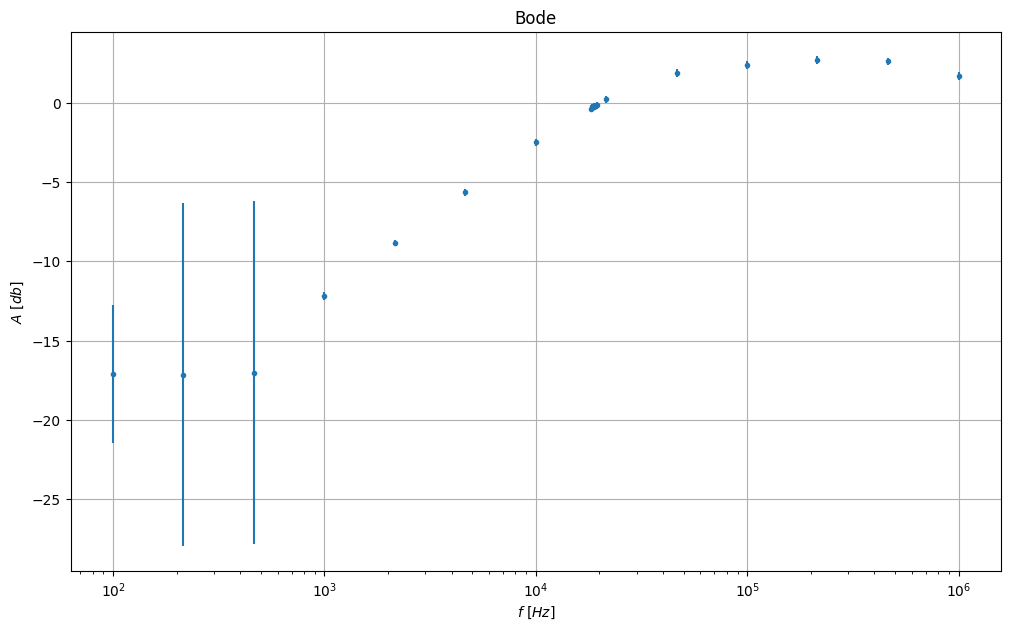

In [ ]:
plt.figure(figsize=(12,7))
plt.errorbar(frequenza_hz, log_A, linestyle="", marker=".", yerr=err_log_A)
plt.xscale("log", base=10)
#plt.axvline(x=20000, ymin=0.1, ymax=0.9)
plt.title("Bode")
plt.xlabel("$f \\ [Hz]$")
plt.ylabel("$A \\ [db]$")
plt.grid()

Modifica dell'analisi, utilizzo di $\omega$,  e $dB$ con fattore 20

a quanto pare, come era possibile prevedere, il passaggio ad omega non ha effetto sulla forma del grafico, è un semplice fattore di strech sulle $x$

In [ ]:
A = []
log_A = []
err_A = []
err_log_A = []
frequenza_hz = []

for i in range(len(v_in)):
  dummy=0
  dummy = v_out[i]/v_in[i]
  A.append(dummy)

for i in A:
  dummy = 0
  dummy =  20*math.log10(i)
  log_A.append(dummy)

for i in frequenza_khz: #aggiungiamo il fattore di conversione per passare a omega
  dummy = 0
  dummy = i*1000*2*math.pi
  frequenza_hz.append(dummy)

#calcolo degli errori
for i in range(len(v_in)):
  dummy_err_vout = math.sqrt( ((1/10)*v_out_div[i])**2 + ((3/100)*v_out[i])**2)
  #print(dummy_err_vout, "err_vout" ,"")
  dummy_err_vin = math.sqrt( ((1/10)*v_in_div[i])**2 + ((3/100)*v_in[i])**2 )
  #print(dummy_err_vin, "err_vin" ,"")
  dummy_g = v_out[i]/v_in[i]
  #print(dummy_g, "g" ,"")
  dummy_err_g = dummy_g * math.sqrt( (dummy_err_vout/v_out[i])**2 + (dummy_err_vin/v_in[i])**2 )
  #print(dummy_err_g, "err_g" ,"")
  dummy_err_A = 20*(dummy_err_g / (dummy_g*math.log(20)))
  err_log_A.append(dummy_err_A)
  #print(dummy_err_A)
  #print("-----------------------------")

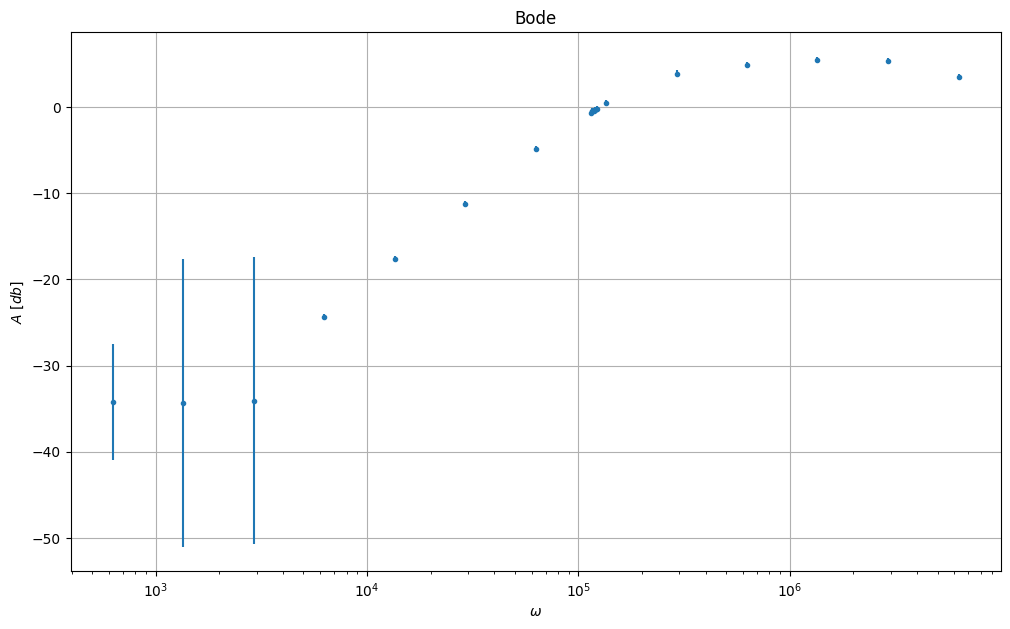

In [ ]:
plt.figure(figsize=(12,7))
plt.errorbar(frequenza_hz, log_A, linestyle="", marker=".", yerr=err_log_A)
plt.xscale("log", base=10)
#plt.axvline(x=20000, ymin=0.1, ymax=0.9)
plt.title("Bode")
plt.xlabel("$\omega$")
plt.ylabel("$A \\ [db]$")
plt.grid()

Supponendo di aver capito la teoria, vediamo che nelle slide l'ampiezza della funzione di trasferimento è data come $\omega*R*C$ possiamo provare a fare un fit lineare eliminando i primi 2 punti e gli ultimi 5+4 del grafico

da [questo documento pagina 30](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiDla7Rrq2CAxUNSPEDHdFEDkkQFnoECBYQAQ&url=https%3A%2F%2Fwww.roma1.infn.it%2F~luci%2FLabSS%2Fopamp.pdf&usg=AOvVaw1n4KBA59kd4EzR6XL2C1BE&opi=89978449) (PDF da scaricare) possiamo ipotizzare che la forma tondeggiante della parte superiore del grafico sia data dal fatto che l'amplificatore è reale, la parte inferiore non ha ancora spiegazione


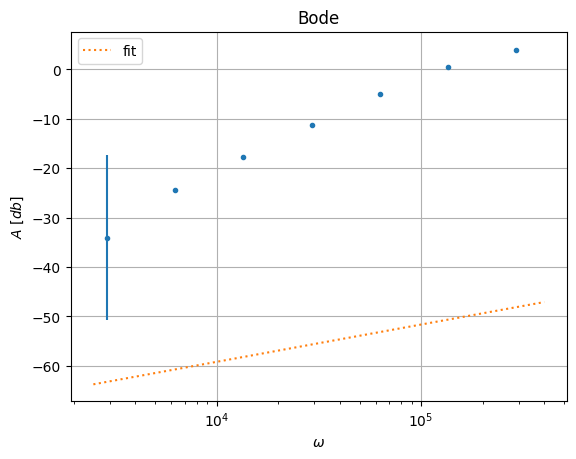

In [ ]:
frequenza_khz = [ 0.464, 1, 2.15, 4.64, 10, 21.5, 46.4]
v_in = [ 1.01, 1.01, 1.01, 1.01, 0.992, 1, 1]
v_out = [ 0.02, 0.061, 0.132, 0.276, 0.564, 1.06, 1.56 ]
v_in_div = [ 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
v_out_div = [0.5, 0.02, 0.02, 0.05, 0.1, 0.2, 0.5]

A = []
log_A = []
err_A = []
err_log_A = []
frequenza_hz = []

for i in range(len(v_in)):
  dummy=0
  dummy = v_out[i]/v_in[i]
  A.append(dummy)

for i in A:
  dummy = 0
  dummy =  20*math.log10(i)
  log_A.append(dummy)

for i in frequenza_khz: #aggiungiamo il fattore di conversione per passare a omega
  dummy = 0
  dummy = i*1000*2*math.pi
  frequenza_hz.append(dummy)

#calcolo degli errori
for i in range(len(v_in)):
  dummy_err_vout = math.sqrt( ((1/10)*v_out_div[i])**2 + ((3/100)*v_out[i])**2)
  dummy_err_vin = math.sqrt( ((1/10)*v_in_div[i])**2 + ((3/100)*v_in[i])**2 )
  dummy_g = v_out[i]/v_in[i]
  dummy_err_g = dummy_g * math.sqrt( (dummy_err_vout/v_out[i])**2 + (dummy_err_vin/v_in[i])**2 )
  dummy_err_A = 20*(dummy_err_g / (dummy_g*math.log(20)))
  err_log_A.append(dummy_err_A)

#plt.figure(figsize=(12,7))
plt.errorbar(frequenza_hz, log_A, linestyle="", marker=".", yerr=err_log_A)
#plt.axvline(x=20000, ymin=0.1, ymax=0.9)
plt.title("Bode")
plt.xlabel("$\omega$")
plt.ylabel("$A \\ [db]$")
plt.grid()
plt.plot( np.linspace(2500,400000,10000) , retta_fit_xba(  np.log10( np.linspace(2500,400000,10000) ) , 7.552351246594405, -89.41187925789427) , marker="", linestyle=":", label="fit")
#retta_fit_xba(x, b,a)
plt.xscale("log", base=10)
plt.legend()

l'intervallo estratto sembra essere lineare, procediamo ad un fit lineare

In [ ]:
regrlin_pear_errpost_xys( np.log(frequenza_hz) , log_A, err_log_A)

pendenza $b$	 7.552351246594405
$\sigma_b$	 0.11364022698268841
intercetta $a$	 -89.41187925789427
$\sigma_a$	 1.2191645905886581
Coefficiente di Pearson $\rho_{xy}$	 0.9916846594329503
$\sigma_{\rho_{xy}}$	 0.05755264762867735
Errore a posteriori $\delta$	 2.4521265421738883


se $RC = b$ allora il valore della frequenza di taglio possiamo calcolarlo come

$f_t = \frac{1}{2b\pi}$

dato che $\omega = f_t*2\pi$

Considerando che abbiamo eseguito un fit in uno spazio logarimico credo sia naturale delogaritmizzare il parametro b prima di procedere con la computazione

In [ ]:
f_t_bode = 1 / ( 2*math.pi*( 1*(7.552351246594405) ) )
print(f_t_bode)

0.021073562112681576


Il modello lineare non ha portato alla solizione desiderata, procediamo quindi al fit, sempre rimuovenmmdo i primi due punti che fuoriescono dal modello presentato nel documento citato sopra, con la seguente funzione

$ A = \frac{R_f}{R_1 + \frac{1}{j\omega C}} $

In [ ]:
def model_function(x, rf, c):
  return rf / (8166.7 + ( 1/ (x*c) ) )

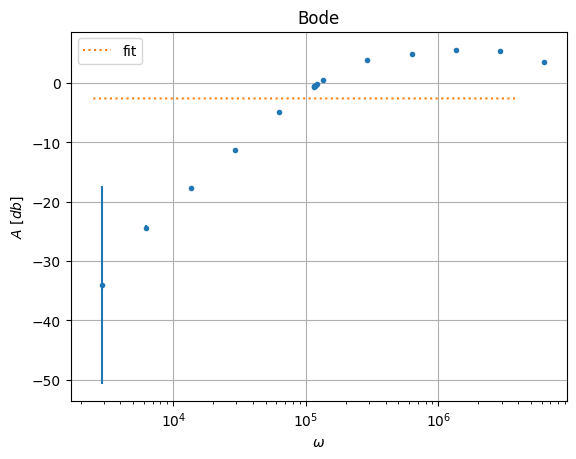

In [ ]:
frequenza_khz = [ 0.464, 1, 2.15, 4.64, 10, 21.5, 46.4, 100, 215, 464, 1000, 18.5, 18.8, 19.1, 19.4, 18.2]
v_in = [ 1.01, 1.01, 1.01, 1.01, 0.992, 1, 1, 1.03, 1, 1.02, 1.02, 1, 1, 1, 1, 1]
v_out = [ 0.02, 0.061, 0.132, 0.276, 0.564, 1.06, 1.56, 1.8, 1.88, 1.88, 1.52, 0.944, 0.952, 0.96, 0.976, 0.928 ]
v_in_div = [ 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
v_out_div = [ 0.5, 0.02, 0.02, 0.05, 0.1, 0.2, 0.5, 0.5, 0.5, 0.5, 0.5, 0.2, 0.2, 0.2, 0.2, 0.2]

A = []
log_A = []
err_A = []
err_log_A = []
frequenza_hz = []

for i in range(len(v_in)):
  dummy=0
  dummy = v_out[i]/v_in[i]
  A.append(dummy)

for i in A:
  dummy = 0
  dummy =  20*math.log10(i)
  log_A.append(dummy)

for i in frequenza_khz: #aggiungiamo il fattore di conversione per passare a omega
  dummy = 0
  dummy = i*1000*2*math.pi
  frequenza_hz.append(dummy)

#calcolo degli errori
for i in range(len(v_in)):
  dummy_err_vout = math.sqrt( ((1/10)*v_out_div[i])**2 + ((3/100)*v_out[i])**2)
  dummy_err_vin = math.sqrt( ((1/10)*v_in_div[i])**2 + ((3/100)*v_in[i])**2 )
  dummy_g = v_out[i]/v_in[i]
  dummy_err_g = dummy_g * math.sqrt( (dummy_err_vout/v_out[i])**2 + (dummy_err_vin/v_in[i])**2 )
  dummy_err_A = 20*(dummy_err_g / (dummy_g*math.log(20)))
  err_log_A.append(dummy_err_A)

#plt.figure(figsize=(12,7))
plt.errorbar(frequenza_hz, log_A, linestyle="", marker=".", yerr=err_log_A)
#plt.axvline(x=20000, ymin=0.1, ymax=0.9)
plt.title("Bode")
plt.xlabel("$\omega$")
plt.ylabel("$A \\ [db]$")
plt.grid()
plt.xscale("log", base=10)
plt.plot(np.linspace(2500,4000000,1000000), model_function(np.linspace(2500,4000000,1000000), -2.12661946e+04, 1.00000000e+00), marker="", linestyle=":", label="fit")
plt.legend()

In [ ]:
param, matrixcov = curve_fit(model_function, frequenza_hz, log_A, sigma=err_log_A)

print("rf, c")
print(param)
print(matrixcov)

rf, c
[-2.12661946e+04  1.00000000e+00]
[[inf inf]
 [inf inf]]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


e questo risultato risulta più inconcludente del precedente, r1 come parametro fisso è stato inserito dopo un trial con r1 variabile dal fit, i risultati sono rimasti inconcludenti